In [4]:
%matplotlib notebook
import math
import triangle
from sympy.plotting import plot3d
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

## slide 3

In [5]:
@np.vectorize  # makes numpy easier
def f(x,y):
    return np.exp(-4*x**2-y**2)
def df(x,y):
    return np.stack( (-8*x,-2*y)  )*np.exp(-4*x**2-y**2)

<IPython.core.display.Javascript object>


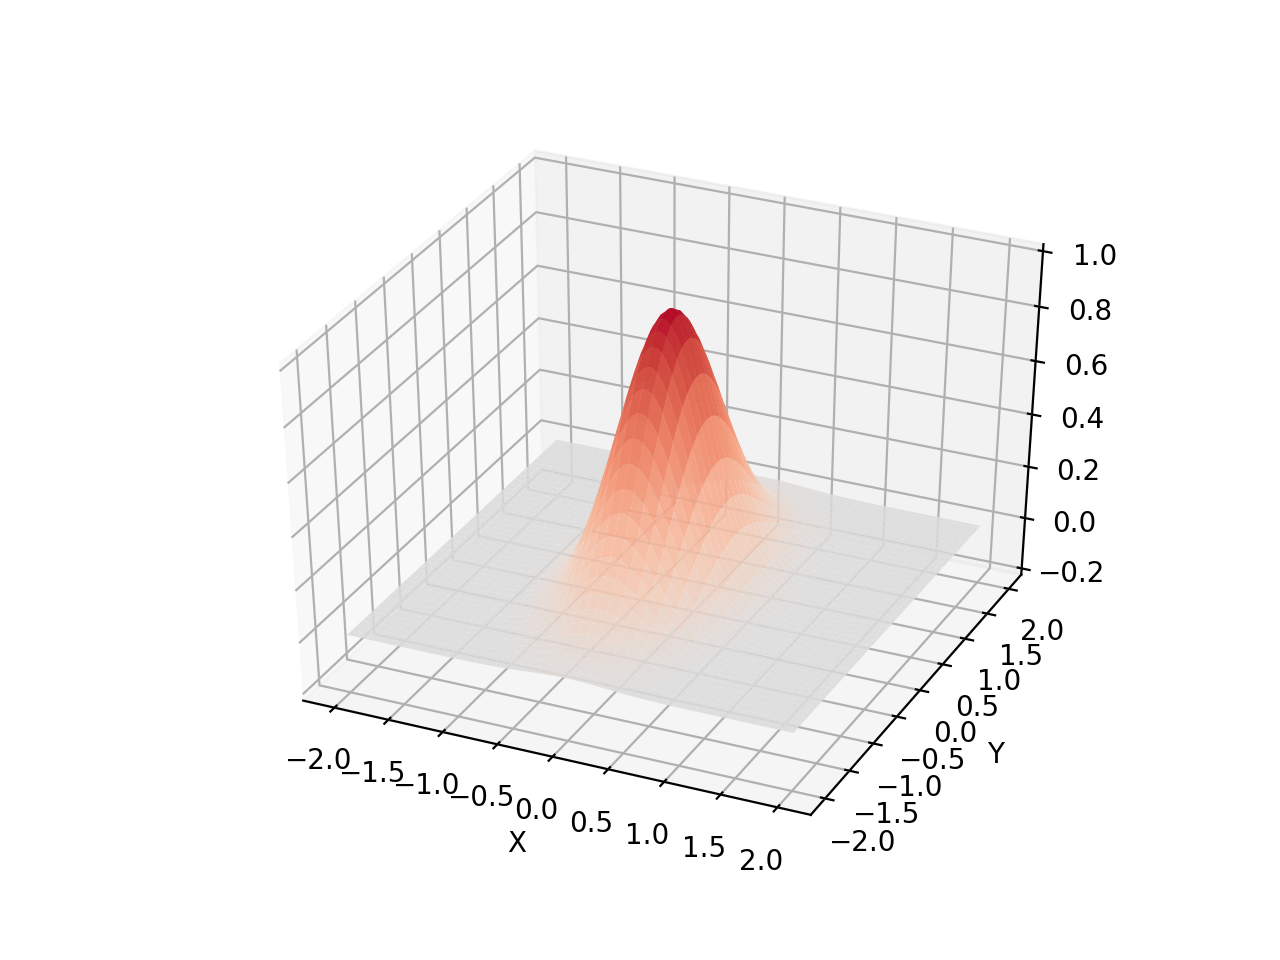

In [6]:
X=np.linspace(-2, 2,90,endpoint=True)
Y=np.linspace(-2, 2,90,endpoint=True)

Xs,Ys=np.meshgrid(X,Y)  # create a 2D grid
Zs = f(Xs,Ys)
fig = plt.figure()

ax = fig.gca(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlim(-0.2,1)
ax.plot_surface( Xs,Ys,Zs,alpha=0.9,cmap=cm.coolwarm,vmin=-1,vmax=1)
ax.view_init(30,-60)

<IPython.core.display.Javascript object>


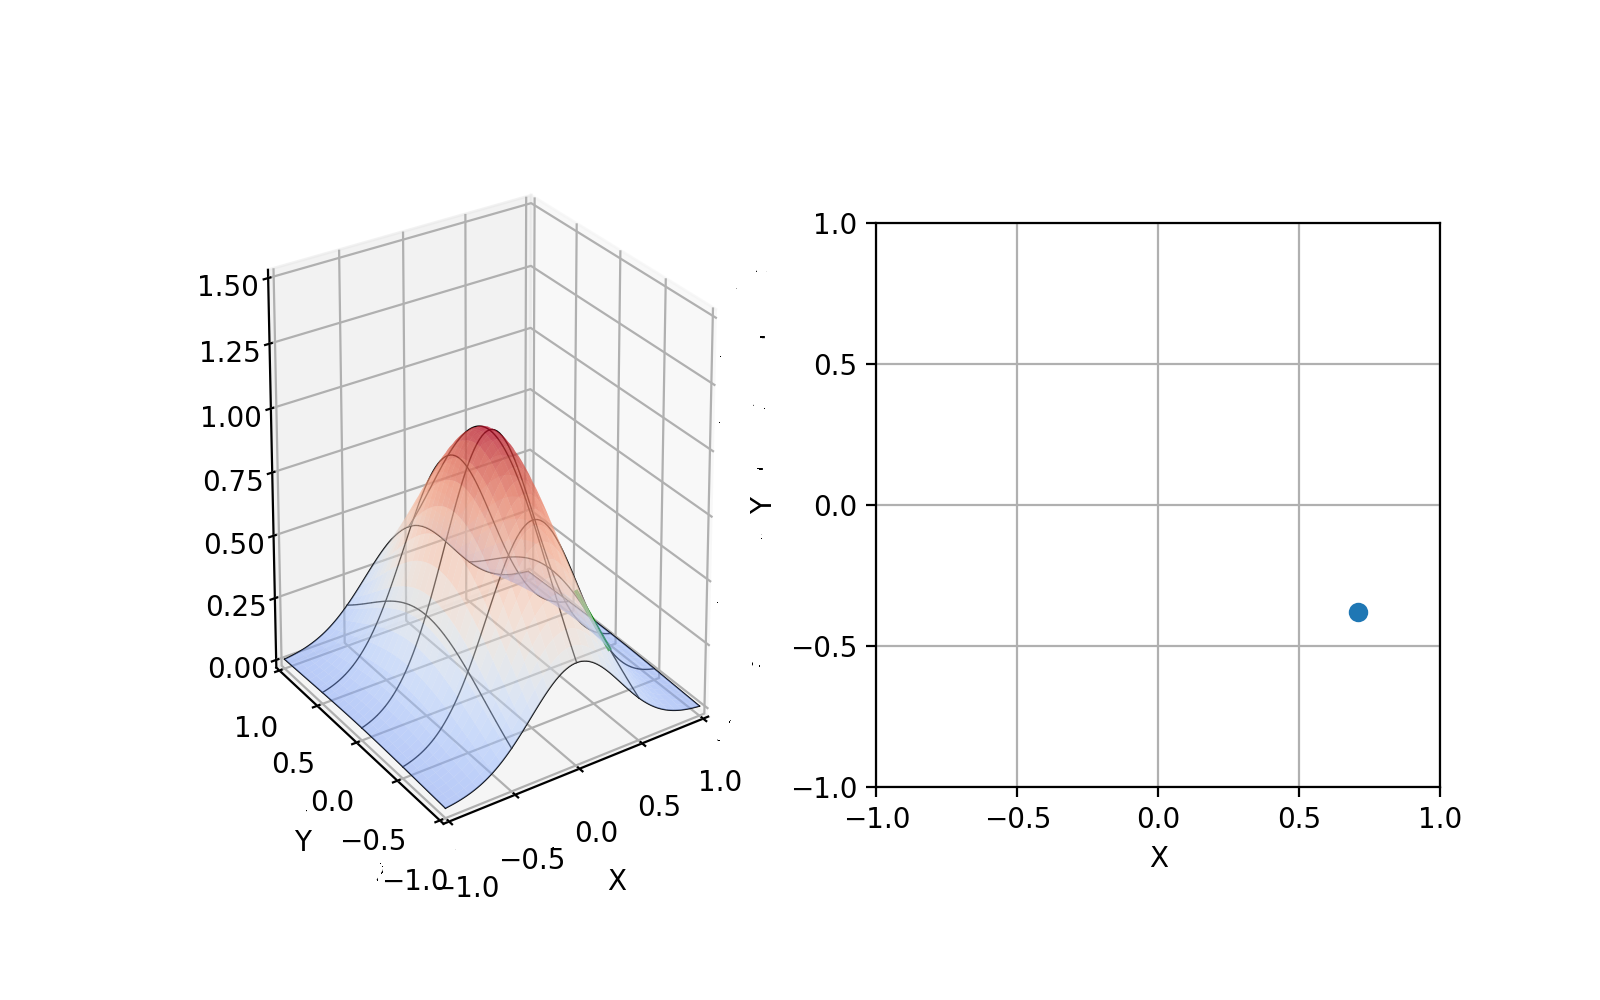

In [7]:
X=np.linspace(-1, 1,101,endpoint=True)
Y=np.linspace(-1, 1,101,endpoint=True)
Xs,Ys=np.meshgrid(X,Y)  # create a 2D grid
Zs = f(Xs,Ys)

fig = plt.figure(figsize=(8,5))
ax1 =  fig.add_subplot(121,projection='3d')
for i in range(0,len(Xs),25):
    ax1.plot( Xs[:,i],Ys[:,i],Zs[:,i],color='k',lw=0.5)
    ax1.plot( Xs[i,:],Ys[i,:],Zs[i,:],color='k',lw=0.5)
ax1.set_xlim(-1,1)
ax1.set_ylim(-1,1)
ax1.set_zlim(0,1.5)

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.plot_surface( Xs,Ys,Zs,alpha=0.5,cmap=cm.coolwarm,vmin=-0.25,vmax=1)
ax1.view_init(22,-65)


x0,y0=0,0.25
dx=0.1
dfxy = df(x0,y0)

nfxy = dfxy/np.sqrt(np.dot(dfxy,dfxy))
cxy = np.array([-dfxy[1],dfxy[0]])
xy0=np.array([x0,y0])
x1,y1 = np.array([x0,y0])+dx*nfxy
vec =ax1.plot([x0,x0+dx*nfxy[0]],[y0,y0+dx*nfxy[1]],[f(x0,y0),f(x1,y1)],color='Green')
            

ax2 =  fig.add_subplot(122)
ax2.set_xlim(-1,1)
ax2.set_ylim(-1,1)
ax2.set_xticks(np.linspace(-1,1.,5,endpoint=True))
ax2.set_yticks(np.linspace(-1,1.,5,endpoint=True))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax2.set_aspect('equal')

#line = ax2.plot(range(10))
point = ax2.plot([1],[1],'o')

global last_event
last_event=None

def onclick(event):
    global last_event
    
    last_event = event#.copy()
    if( event.inaxes in [ax2] ):
        x0,y0 = event.xdata,event.ydata
        point[0].set_xdata(x0)
        point[0].set_ydata(y0)
        
        dx=0.25
        dfxy = df(x0,y0)
        nfxy = dfxy/np.sqrt(np.dot(dfxy,dfxy))
        x1,y1 = np.array([x0,y0])+dx*nfxy
        vec[0].set_data([x0,x0+dx*nfxy[0]],[y0,y0+dx*nfxy[1]])
        vec[0].set_3d_properties([f(x0,y0),f(x1,y1)])
        
        
    

fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

<IPython.core.display.Javascript object>


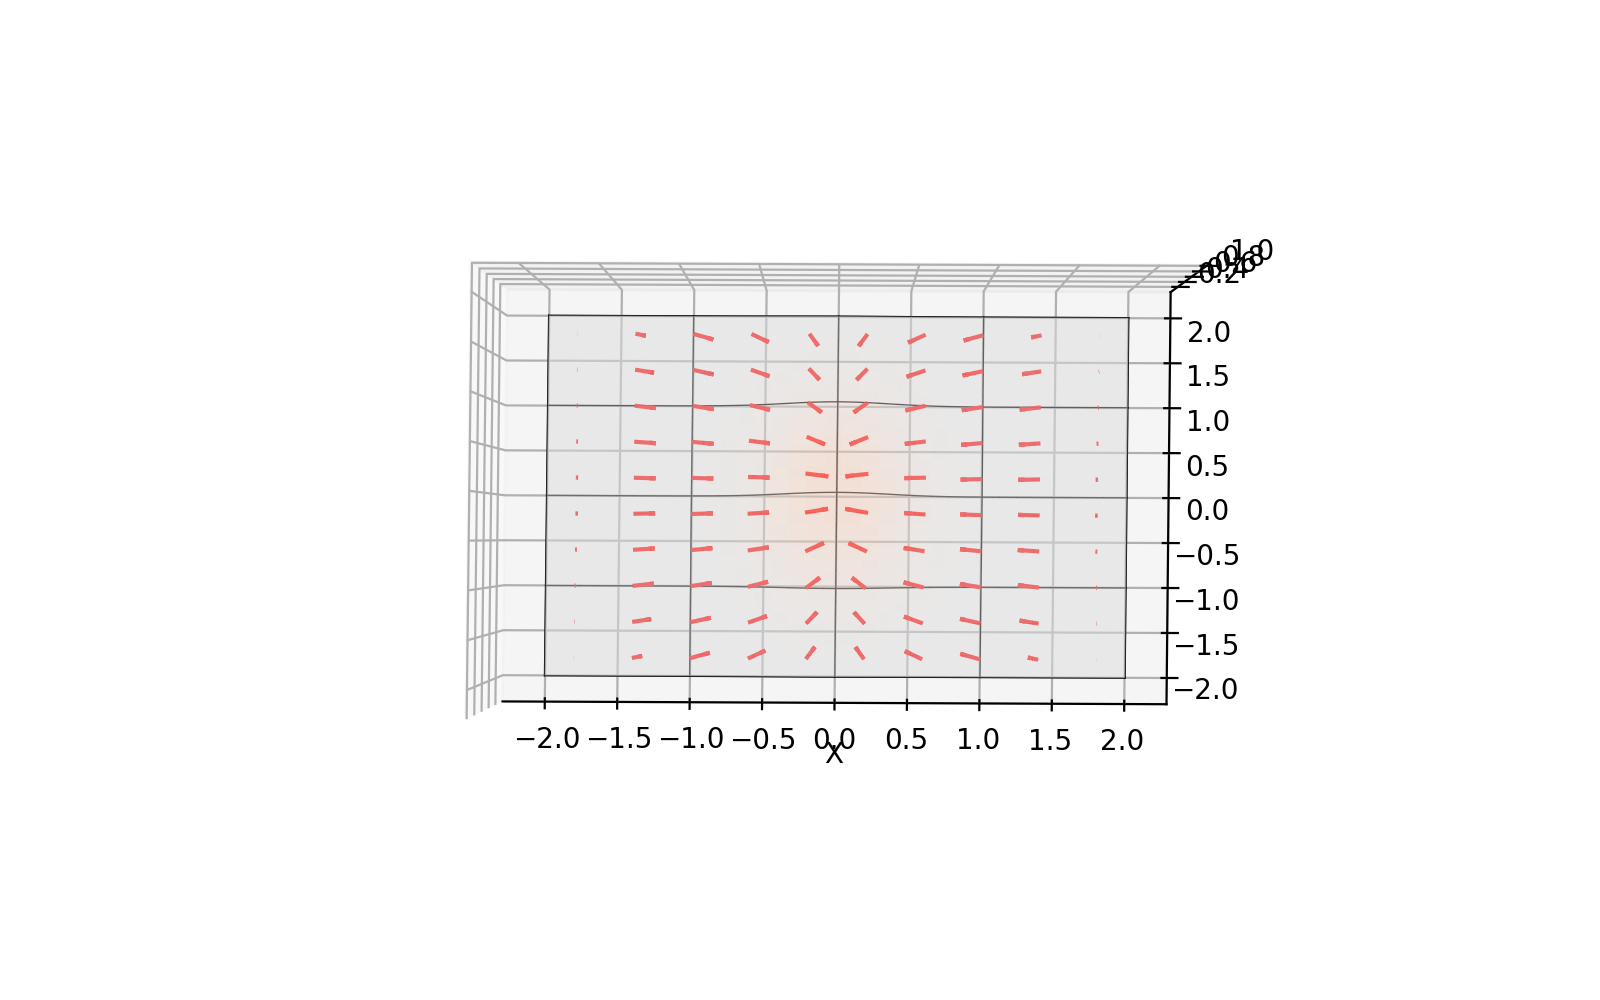

In [8]:
X=np.linspace(-2, 2,101,endpoint=True)
Y=np.linspace(-2, 2,101,endpoint=True)
Xs,Ys=np.meshgrid(X,Y)  # create a 2D grid
Zs = f(Xs,Ys)
levels=np.linspace(-3,3,7,endpoint=True)

Xq,Yq = Xs[5::10,5::10],Ys[5::10,5::10]
Zq = f(Xq,Yq)
dfq = df(Xq,Yq)
Uq,Vq = 1.5*dfq/np.sqrt(np.sum(dfq*dfq,axis=0)+1e-7)
EE = np.sqrt(np.sum(dfq**2))
#Wq =f(Xq+Uq,Yq+Vq)-Zq
Wq=np.sqrt(np.sum(dfq*dfq,axis=0))


fig = plt.figure(figsize=(8,5))
ax1 =  fig.add_subplot(111,projection='3d')
ax1.set_xlabel('X')
for i in range(0,len(Xs),25):
    ax1.plot( Xs[:,i],Ys[:,i],Zs[:,i],color='k',lw=0.5)
    ax1.plot( Xs[i,:],Ys[i,:],Zs[i,:],color='k',lw=0.5)
ax1.plot_surface( Xs,Ys,Zs,alpha=0.5,cmap=cm.coolwarm,vmin=-5,vmax=5)
ax1.quiver(Xq,Yq,Zq, Uq,Vq,Wq, colors='Red', length=0.1, normalize=False)

<IPython.core.display.Javascript object>


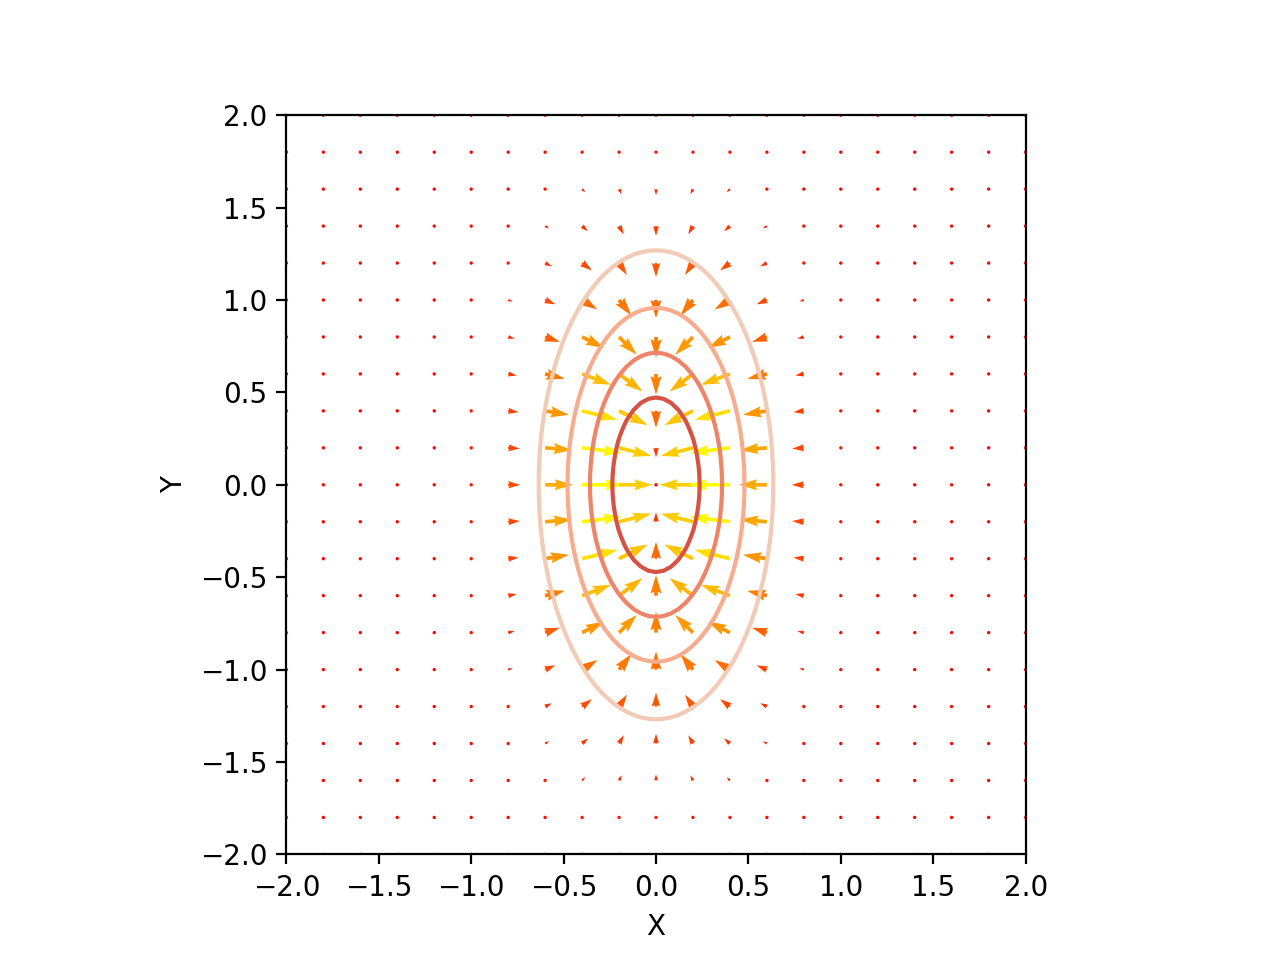

In [9]:
fig,ax = plt.subplots(1,1)
#plt.contourf(Xs,Ys,Zs,levels=np.linspace(0,+1,11,endpoint=True),cmap=cm.coolwarm,vmin=-1,vmax=1)
CS=plt.contour(Xs,Ys,Zs,levels=np.linspace(-1,+1,11,endpoint=True),cmap=cm.coolwarm,vmin=-1,vmax=1)
#ax.clabel(CS, CS.levels,fmt="%.1f")
ax.set_xlabel('X')
ax.set_ylabel('Y')
Us,Vs=df(Xs,Ys)
ns = 5
EE = np.sqrt(Us**2+Vs**2)
ax.quiver(Xs[::ns,::ns],Ys[::ns,::ns],Us[::ns,::ns],Vs[::ns,::ns],EE[::ns,::ns],width=0.005,scale=30,cmap=cm.autumn)
ax.set_aspect('equal')

<IPython.core.display.Javascript object>


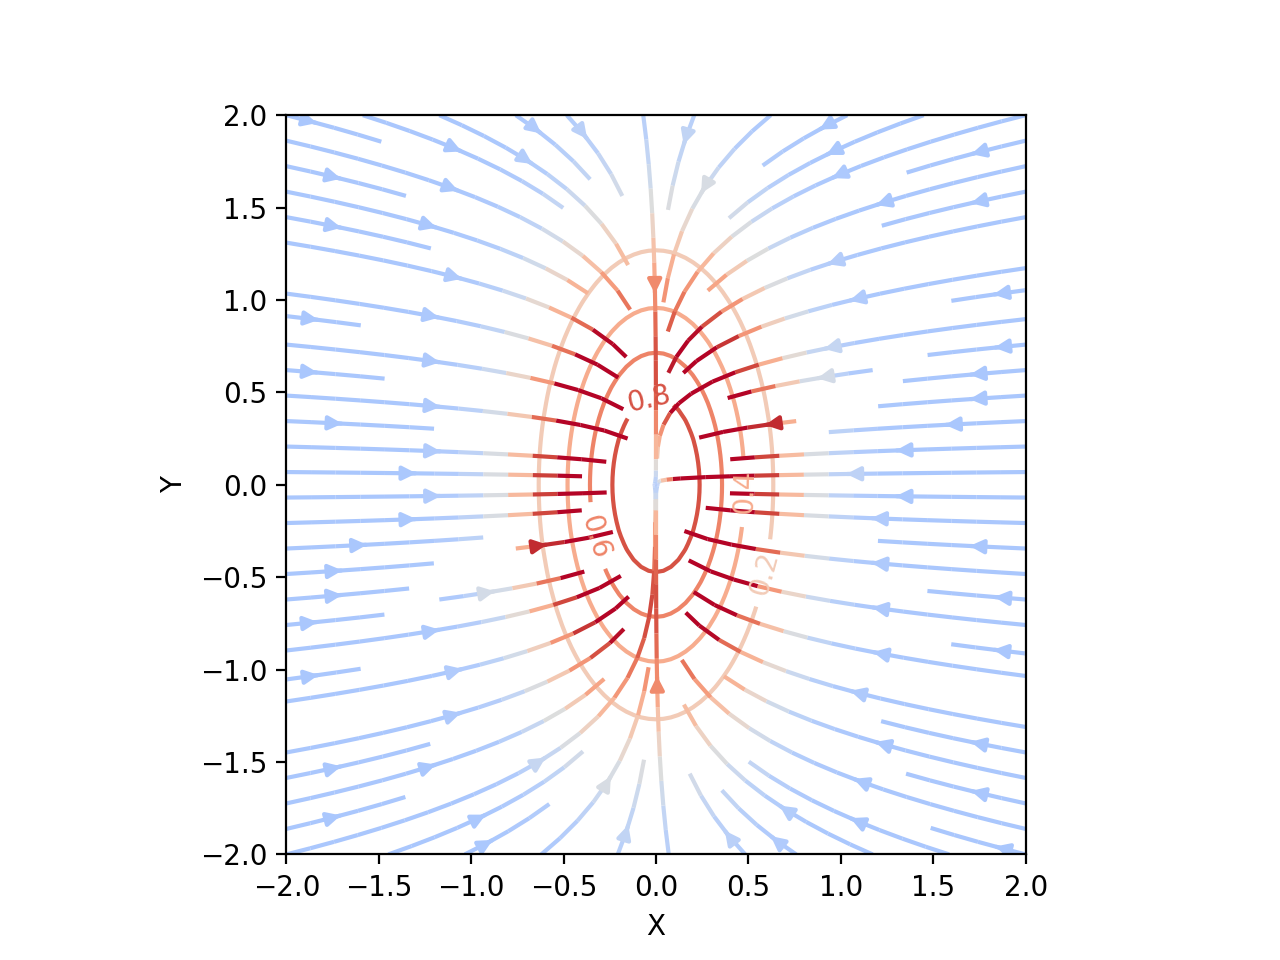

In [10]:
import matplotlib as mpl
fig,ax = plt.subplots(1,1)
#plt.contourf(Xs,Ys,Zs,levels=np.linspace(0,+1,11,endpoint=True),cmap=cm.coolwarm,vmin=-1,vmax=1)
CS=plt.contour(Xs,Ys,Zs,levels=np.linspace(-1,+1,11,endpoint=True),cmap=cm.coolwarm,vmin=-1,vmax=1)
ax.clabel(CS, CS.levels,fmt="%.1f")
ax.set_xlabel('X')
ax.set_ylabel('Y')
Us,Vs=df(Xs,Ys)
ax.streamplot(Xs,Ys,Us,Vs,color=EE,density=(1,1),cmap=cm.coolwarm,norm=mpl.colors.Normalize(vmin=-0.5,vmax=1))
ax.set_aspect('equal')

## slide 6

In [11]:
@np.vectorize  # makes numpy easier
def f(x,y):
    return x**2-y**2
def df(x,y):
    return np.stack( (2*x,-2*y)  )

<IPython.core.display.Javascript object>


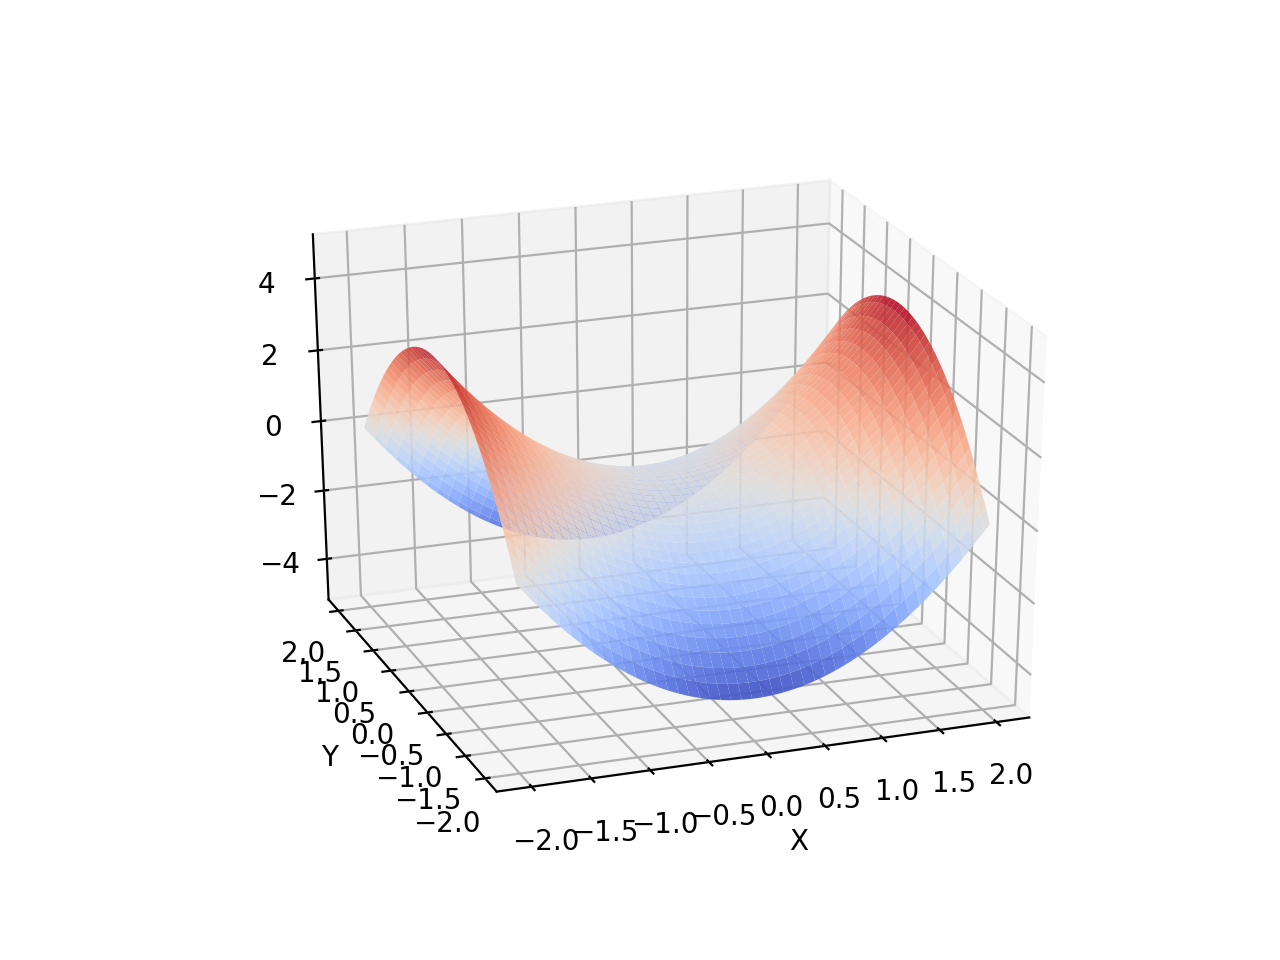

In [12]:
X=np.linspace(-2, 2,90,endpoint=True)
Y=np.linspace(-2, 2,90,endpoint=True)

Xs,Ys=np.meshgrid(X,Y)  # create a 2D grid
Zs = f(Xs,Ys)
fig = plt.figure()

ax = fig.gca(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlim(-5,5)
ax.plot_surface( Xs,Ys,Zs,alpha=0.9,cmap=cm.coolwarm,vmin=-4,vmax=4)
ax.view_init(30,-60)

<IPython.core.display.Javascript object>


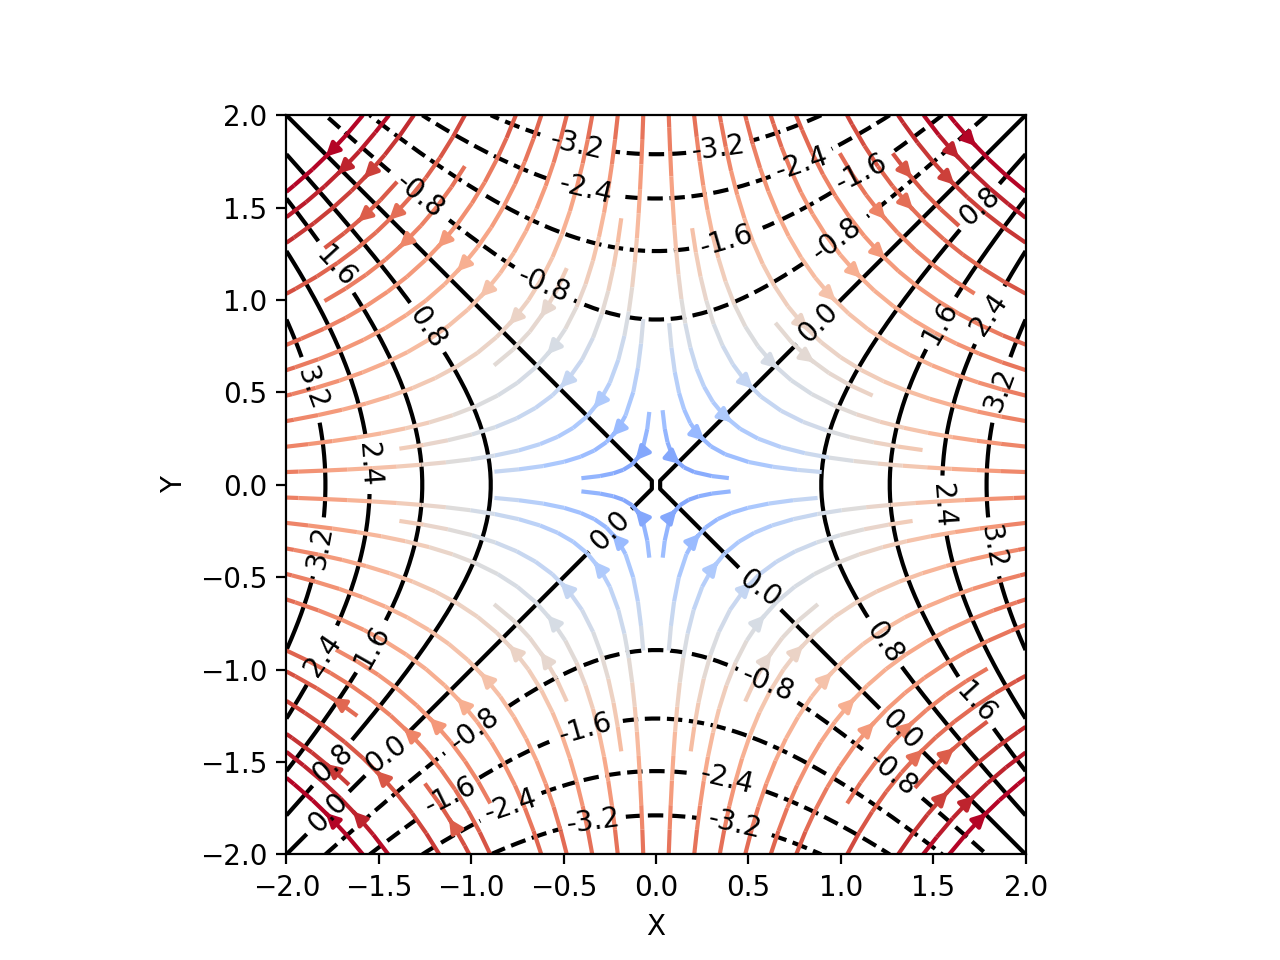

In [13]:
import matplotlib as mpl
fig,ax = plt.subplots(1,1)
#plt.contourf(Xs,Ys,Zs,levels=np.linspace(0,+1,11,endpoint=True),cmap=cm.coolwarm,vmin=-1,vmax=1)
CS=plt.contour(Xs,Ys,Zs,levels=np.linspace(-4,+4,11,endpoint=True),colors='Black')
ax.clabel(CS, CS.levels,fmt="%.1f")
ax.set_xlabel('X')
ax.set_ylabel('Y')
Us,Vs=df(Xs,Ys)
EE=np.sqrt(Us**2+Vs**2)
ax.streamplot(Xs,Ys,Us,Vs,color=EE,density=(1,1),cmap=cm.coolwarm,norm=mpl.colors.Normalize(vmin=-1,vmax=5))
ax.set_aspect('equal')

## slide 13

In [14]:
@np.vectorize  # makes numpy easier
def f(x,y):
    return-np.exp(-2*(x+0.75)**2-3*(y+0.5)**2) \
          +np.exp(-2*(x+0.75)**2-3*(y-0.5)**2) \
        +3*np.exp(-5*(x-0.50)**2-3*(y+0.2)**2)  
def df(x,y):
    dx=0.01
    return np.stack( (f(x+dx,y)-f(x-dx,y),f(x,y+dx)-f(x,y-dx)) )/(2*dx)

<IPython.core.display.Javascript object>


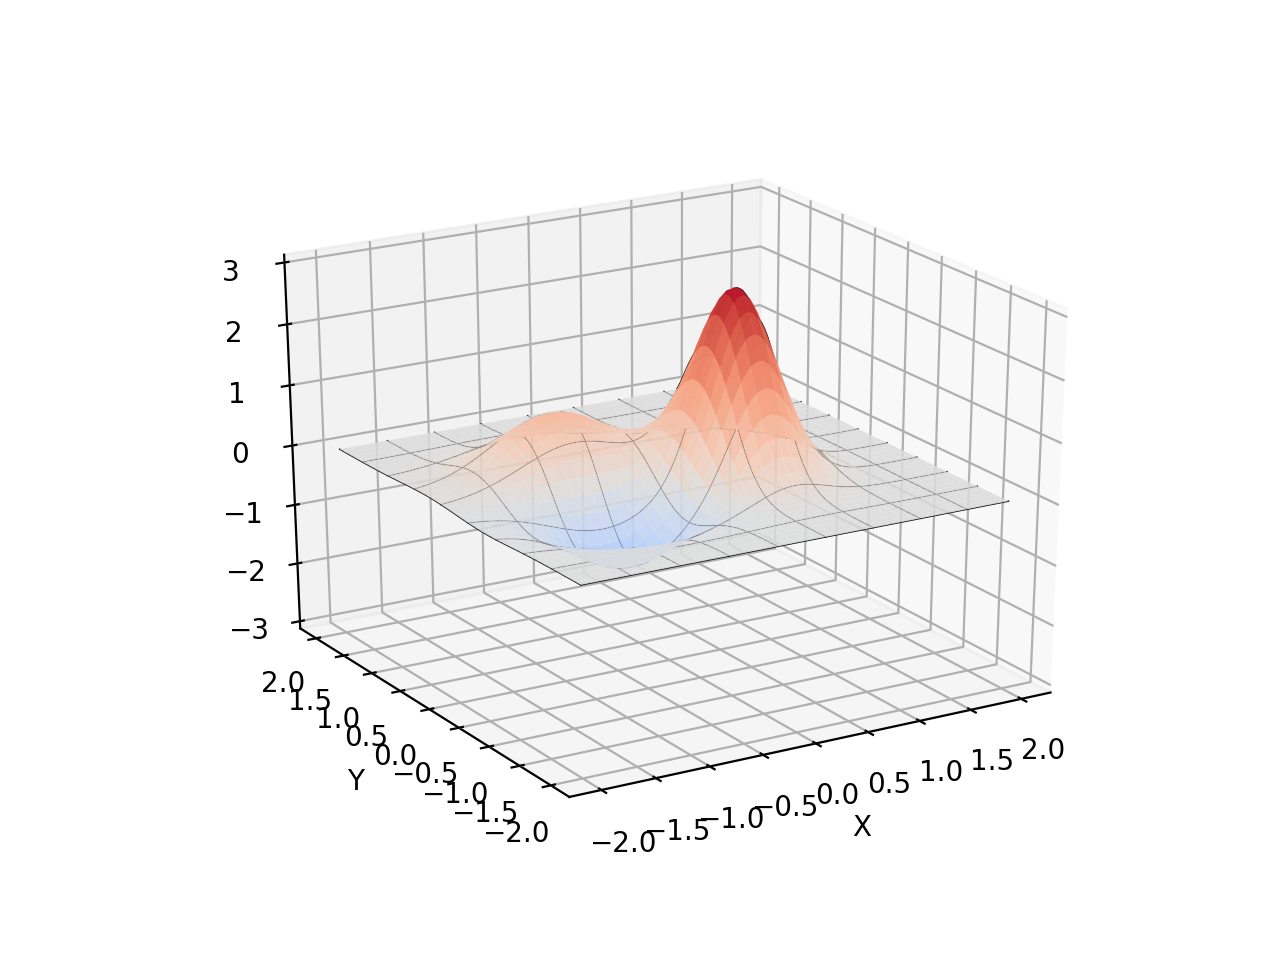

In [15]:
X=np.linspace(-2, 2,90,endpoint=True)
Y=np.linspace(-2, 2,90,endpoint=True)

Xs,Ys=np.meshgrid(X,Y)  # create a 2D grid
Zs = f(Xs,Ys)
fig = plt.figure()


ax = fig.gca(projection='3d')


for i in range(0,len(Xs),10):
    ax.plot( Xs[:,i],Ys[:,i],Zs[:,i],color='k',lw=0.5)
    ax.plot( Xs[i,:],Ys[i,:],Zs[i,:],color='k',lw=0.5)
    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlim(-3,3)
ax.plot_surface( Xs,Ys,Zs,alpha=0.9,cmap=cm.coolwarm,vmin=-3,vmax=3)
ax.view_init(30,-60)

<IPython.core.display.Javascript object>


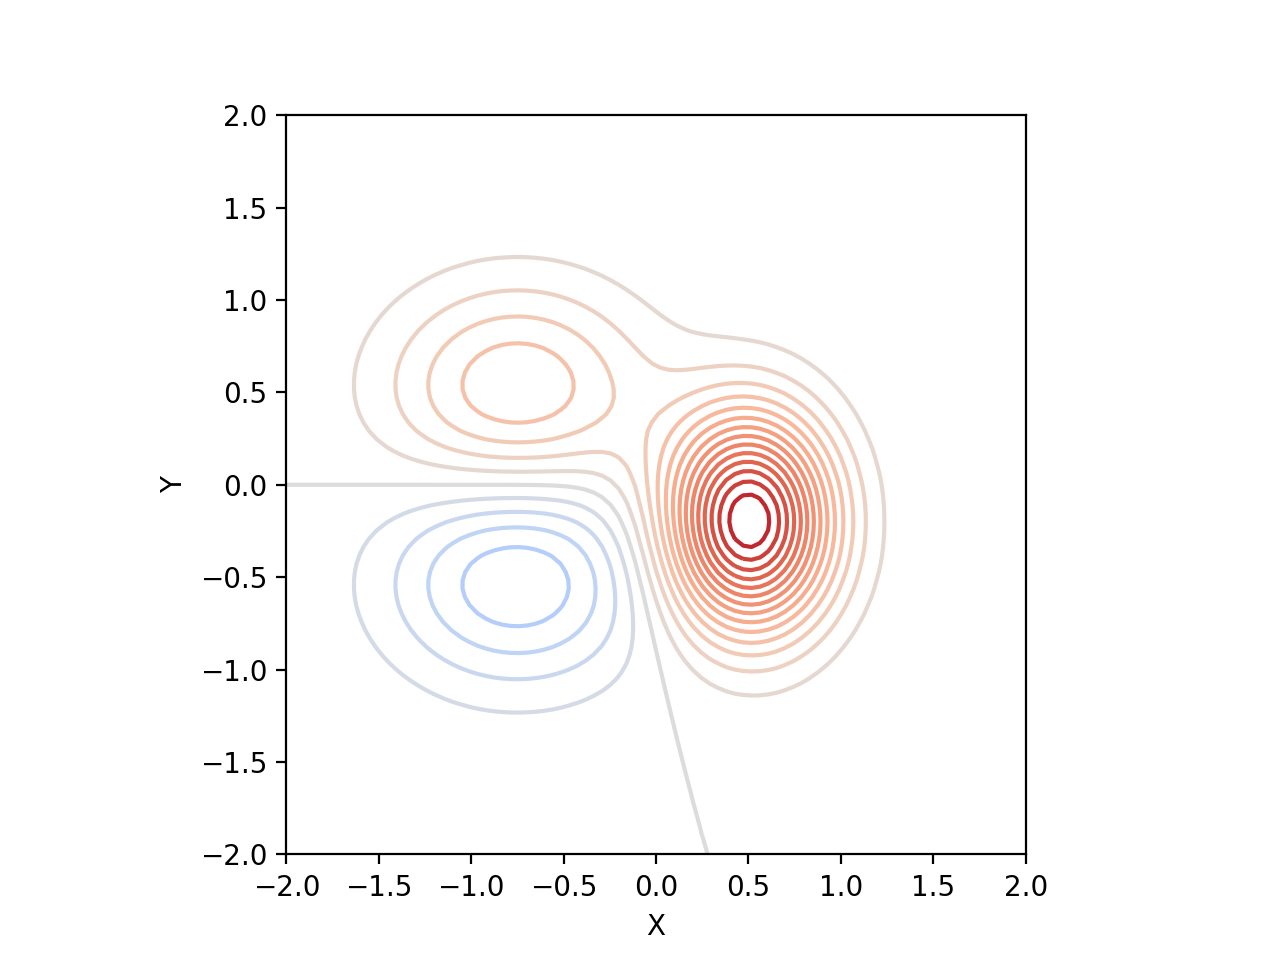

In [16]:
fig,ax = plt.subplots(1,1)
plt.contour(Xs,Ys,Zs,levels=np.linspace(-2,+4,31,endpoint=True),cmap=cm.coolwarm,vmin=-3,vmax=3)
#CS=plt.contour(Xs,Ys,Zs,levels=np.linspace(-1,+1,11,endpoint=True),cmap=cm.coolwarm,vmin=-1,vmax=1)
ax.clabel(CS, CS.levels,fmt="%.1f")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

<IPython.core.display.Javascript object>


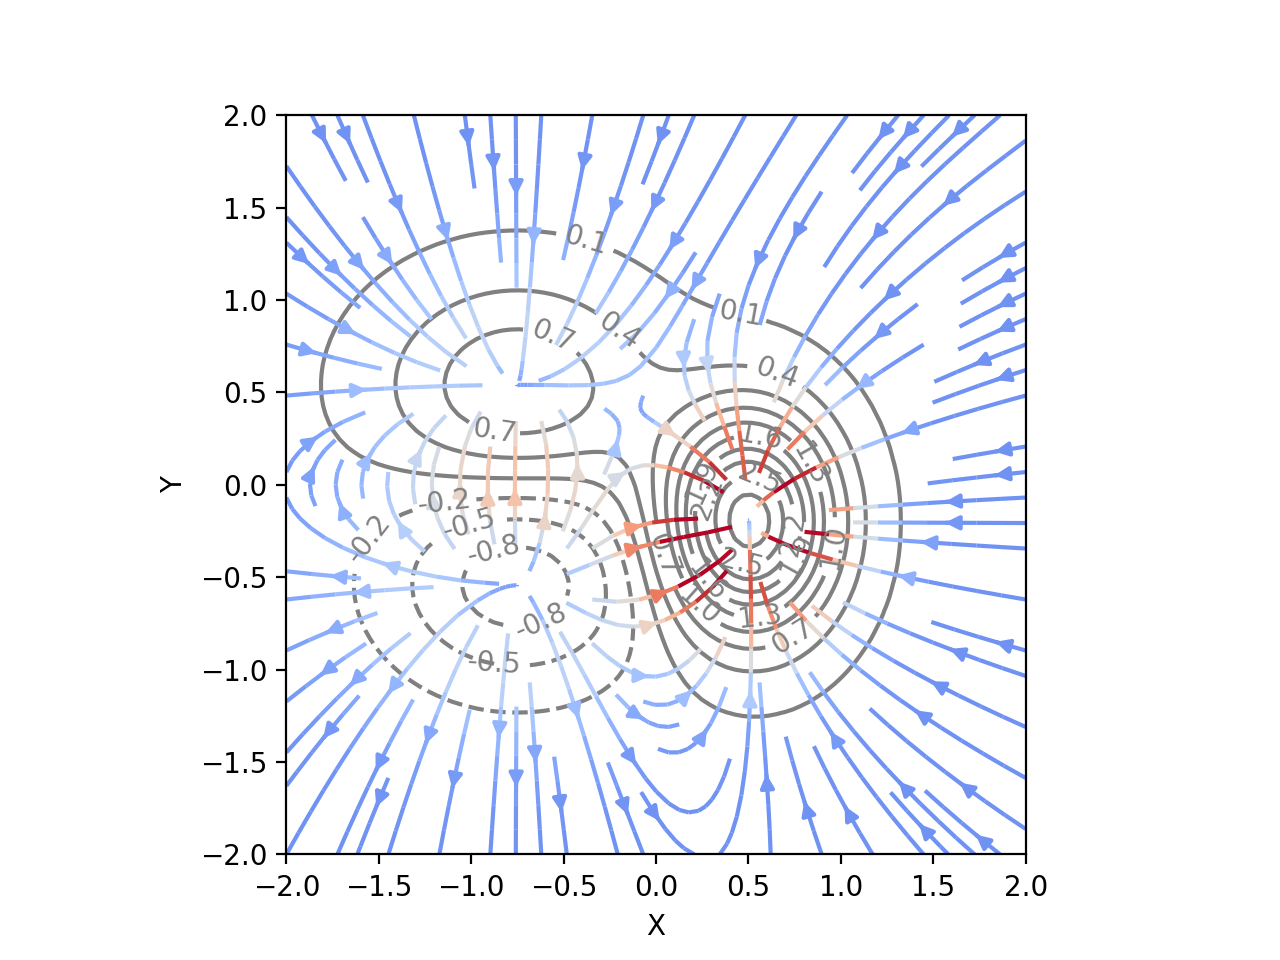

/Users/evenhuis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: The following kwargs were not used by contour: 'lw'
  after removing the cwd from sys.path.


In [17]:
import matplotlib as mpl
fig,ax = plt.subplots(1,1)
#plt.contourf(Xs,Ys,Zs,levels=np.linspace(0,+1,11,endpoint=True),cmap=cm.coolwarm,vmin=-1,vmax=1)
CS=plt.contour(Xs,Ys,Zs,levels=np.linspace(-2,+4,21,endpoint=True),colors='Grey',lw=0.5)
ax.clabel(CS, CS.levels,fmt="%.1f")
ax.set_xlabel('X')
ax.set_ylabel('Y')
Us,Vs=df(Xs,Ys)
EE=np.sqrt(Us**2+Vs**2)
ax.streamplot(Xs,Ys,Us,Vs,color=EE,density=(1,1),cmap=cm.coolwarm,norm=mpl.colors.Normalize(vmin=-1,vmax=5))
ax.set_aspect('equal')

## slide 21

In [18]:
@np.vectorize  # makes numpy easier
def f(x,y):
    return 3*x -x**3-2*y**2+y**4

<IPython.core.display.Javascript object>


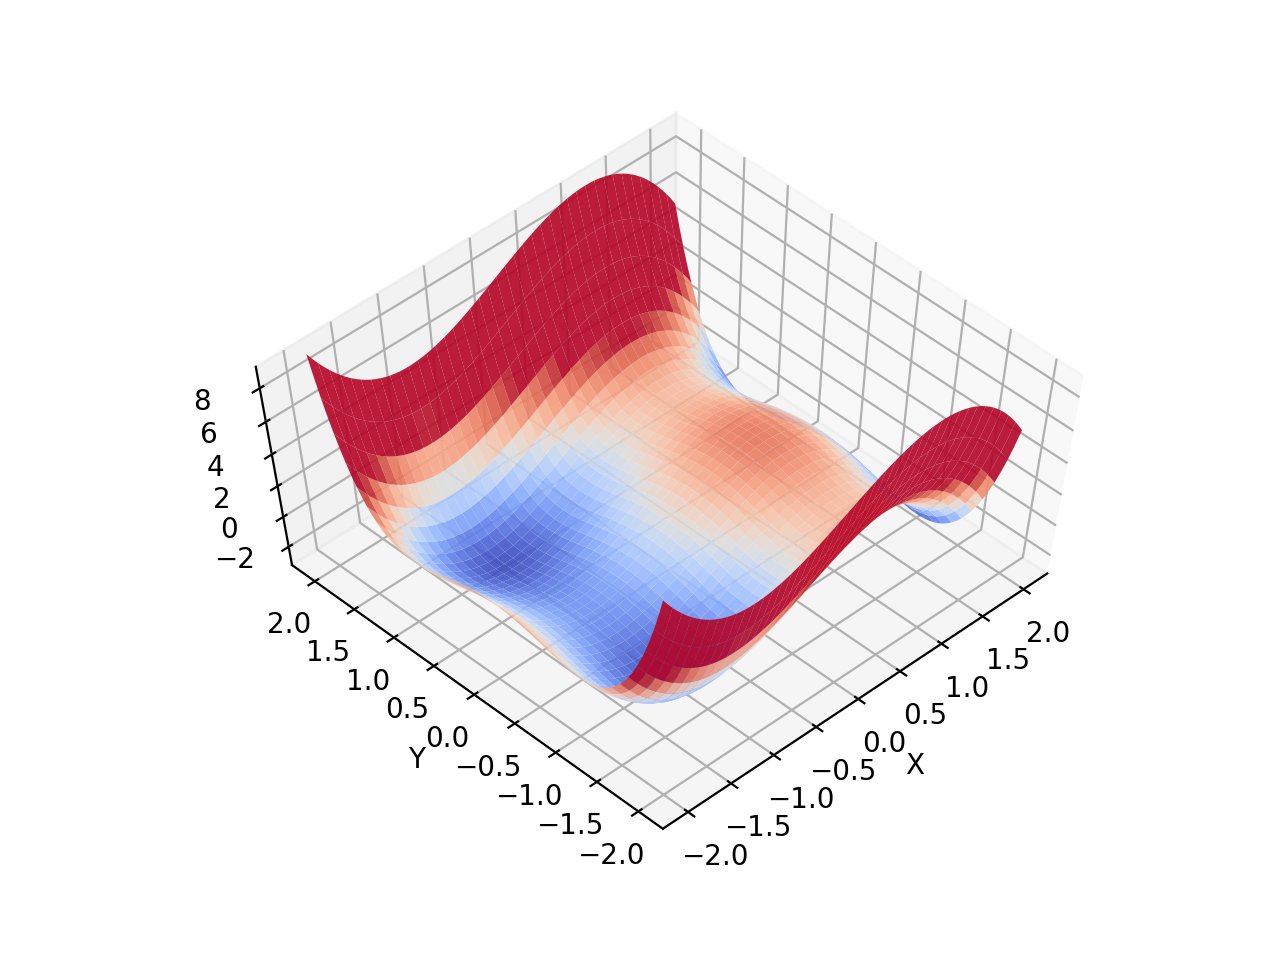

In [19]:
X=np.linspace(-2, 2,81,endpoint=True)
Y=np.linspace(-2, 2,81,endpoint=True)

Xs,Ys=np.meshgrid(X,Y)  # create a 2D grid
Zs = f(Xs,Ys)
fig = plt.figure()

ax = fig.gca(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlim(-3,9)
ax.plot_surface( Xs,Ys,Zs,alpha=0.9,cmap=cm.coolwarm,vmin=-3,vmax=3)
ax.view_init(30,-60)

<IPython.core.display.Javascript object>


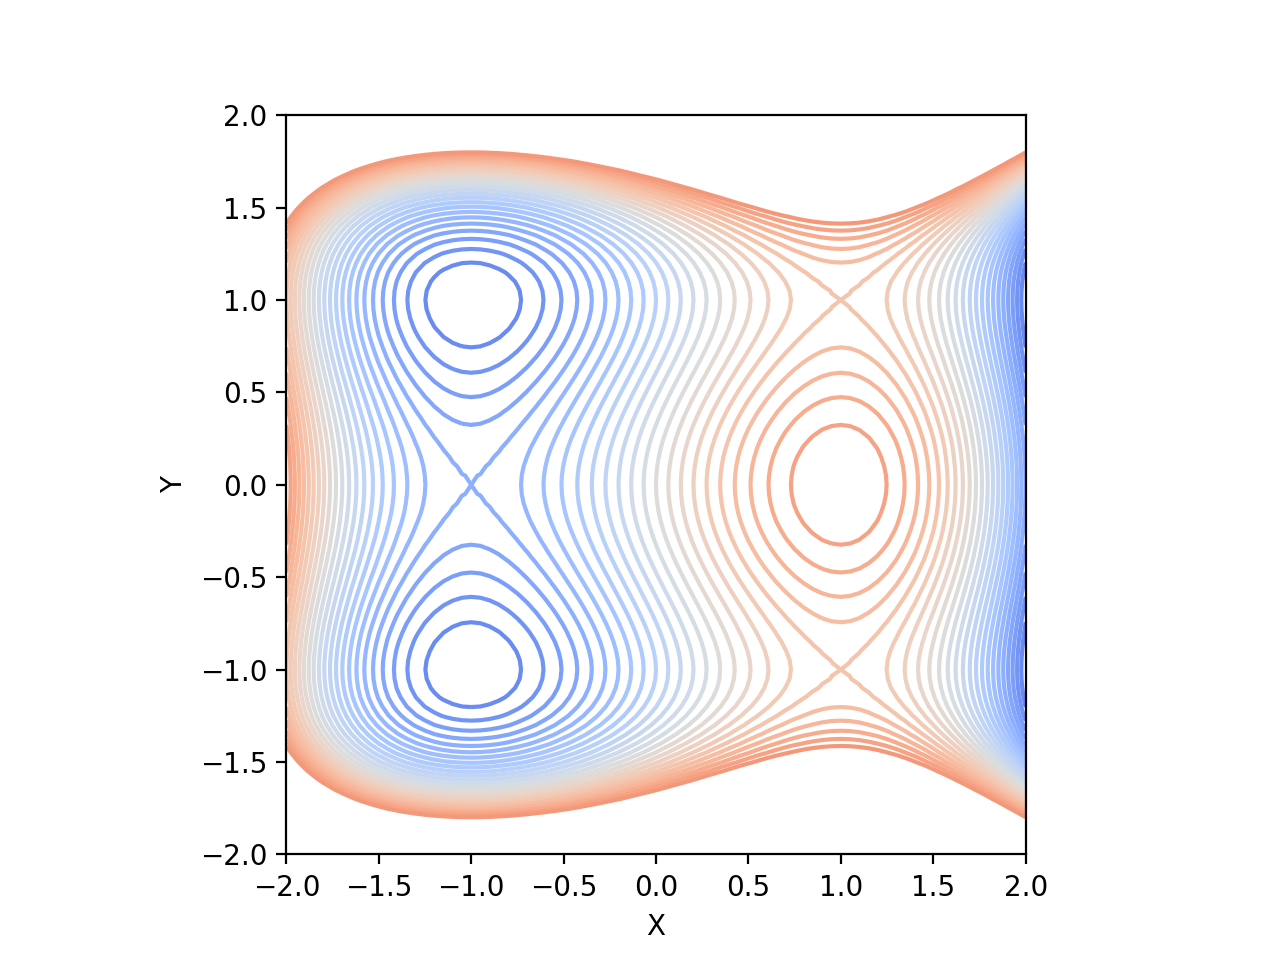

In [20]:
fig,ax = plt.subplots(1,1)
plt.contour(Xs,Ys,Zs,levels=np.linspace(-4,+2,31,endpoint=True),cmap=cm.coolwarm,vmin=-4,vmax=4)
#CS=plt.contour(Xs,Ys,Zs,levels=np.linspace(-1,+1,11,endpoint=True),cmap=cm.coolwarm,vmin=-1,vmax=1)
ax.clabel(CS, CS.levels,fmt="%.1f")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

In [ ]:
import matplotlib as mpl
fig,ax = plt.subplots(1,1)
#plt.contourf(Xs,Ys,Zs,levels=np.linspace(0,+1,11,endpoint=True),cmap=cm.coolwarm,vmin=-1,vmax=1)
CS=plt.contour(Xs,Ys,Zs,levels=np.linspace(-4,+2,13,endpoint=True),colors='Grey',lw=0.5)
ax.clabel(CS, CS.levels,fmt="%.1f")
ax.set_xlabel('X')
ax.set_ylabel('Y')
Us,Vs=df(Xs,Ys)
EE=np.sqrt(Us**2+Vs**2)
ax.streamplot(Xs,Ys,Us,Vs,color=EE,density=(1,1),cmap=cm.coolwarm,norm=mpl.colors.Normalize(vmin=0,vmax=5))
ax.set_aspect('equal')

## Hyperboloid

<IPython.core.display.Javascript object>


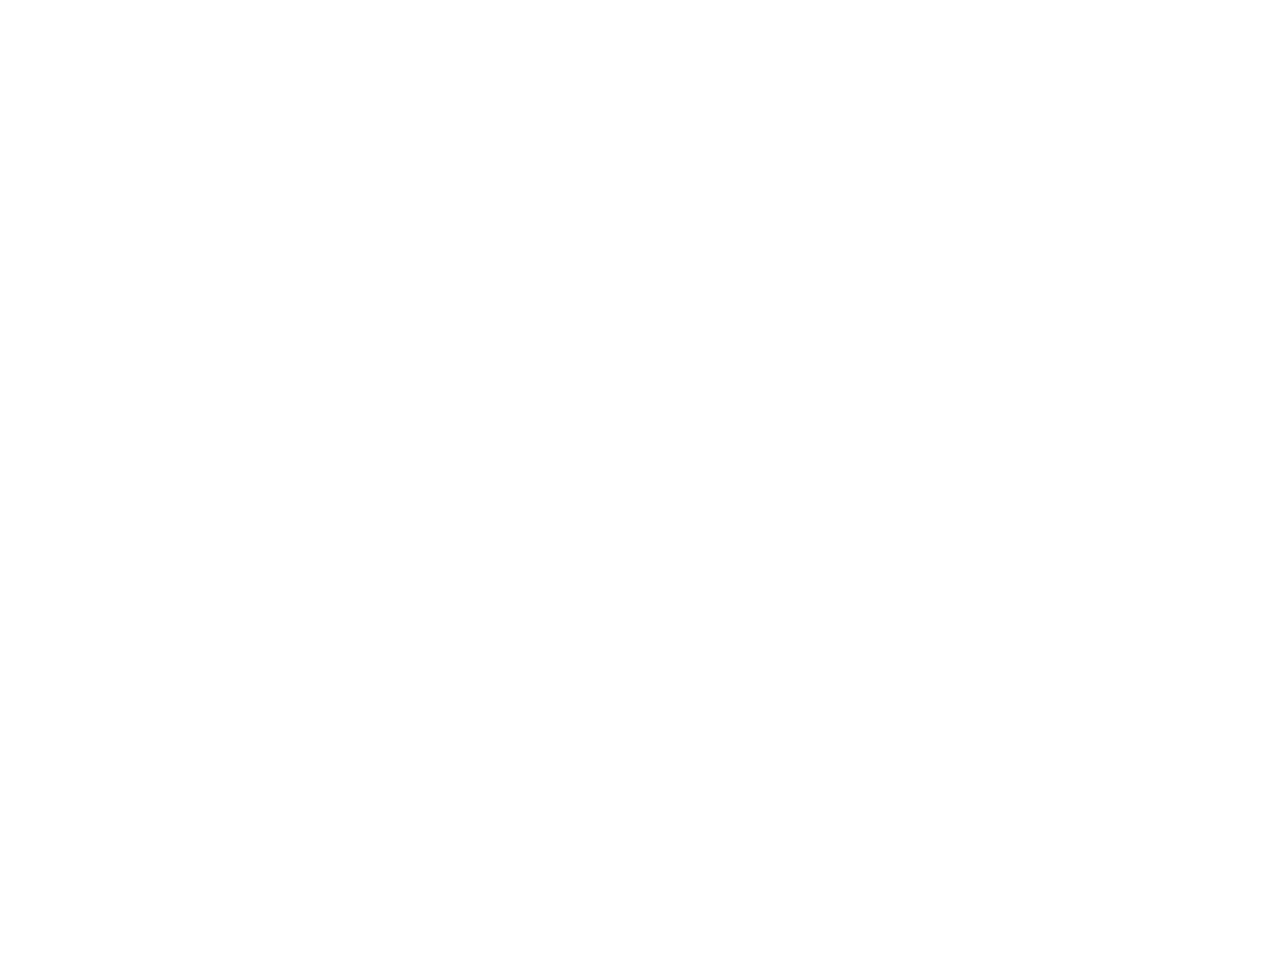

<IPython.core.display.Javascript object>


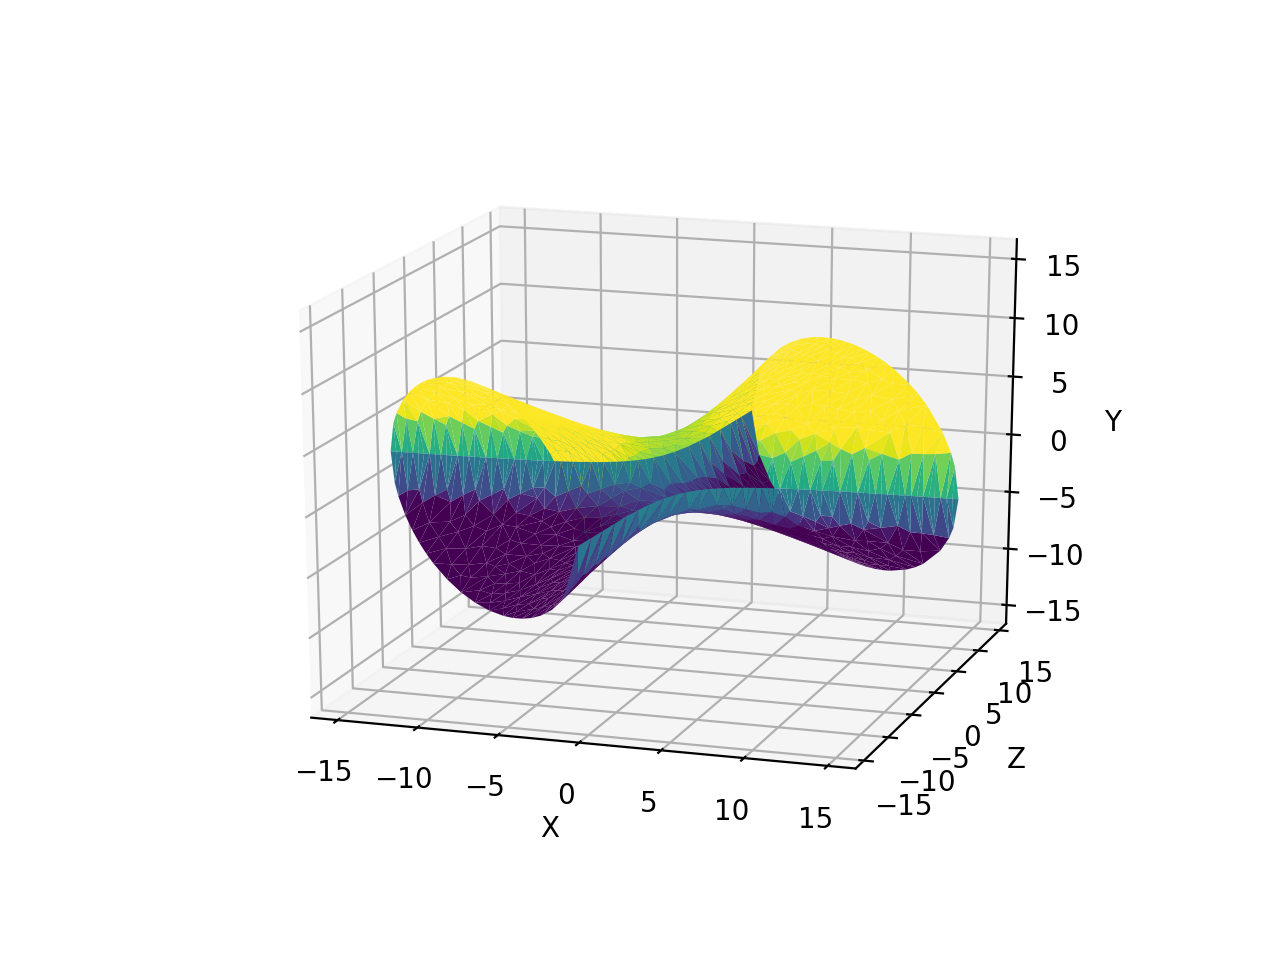

In [21]:
%matplotlib notebook 
import math
import triangle
from sympy.plotting import plot3d
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def create_mesh( pathXY, minArea=0.05 ):
    N=len(pathXY)
    i=np.arange(N)
    segs=np.stack([i, i + 1], axis=1) % N
    tri=triangle.triangulate({'vertices':pathXY,'segments':segs},'qpa{}'.format(minArea))
    return tri

@np.vectorize  # makes numpy easier
def f(x,y):
    
    return  np.sqrt(max(0,9+x*y)) 

X=np.linspace(-5, 5,60,endpoint=True)
Y=np.linspace(-5, 5,60,endpoint=True)

Xs,Ys=np.meshgrid(X,Y)  # create a 2D grid
Zs = f(Xs,Ys)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
#ax.set_zlim(0,5)
ax.plot_surface( Xs,Ys, Zs, alpha=0.75,cmap=cm.coolwarm,vmin=0,vmax=4)

ax.plot_surface( Xs,Ys,-Zs, alpha=0.75,cmap=cm.coolwarm,vmin=0,vmax=4)
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1,1,1.4,1]))
ax.view_init(30,-120)

A=18
x = np.linspace(9/A,A,50,endpoint=True)
path1 = np.stack((x, 9/x),axis=1)
path2 = np.stack((x,-9/x),axis=1)
path=np.concatenate((path2,-path2[::1]))
if( False ):
    fig,ax=plt.subplots(1,1)
    ax.plot(path1[:,0],path1[:,1])
    ax.plot(path2[:,0],path2[:,1])
    ax.plot(path[:,0],path[:,1])
    tri=create_mesh(path,minArea=1)
    #fig,ax = plt.subplots(1,1)
    triangle.plot(ax,**tri)
    #ax.set_aspect('equal')

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')
ax.set_xlim(-16,+16)
ax.set_ylim(-16,+16)
ax.set_zlim(-16,+16)

tri = create_mesh(path,minArea=0.8)
XY,triangles=tri['vertices'],tri['triangles']
Z=f(XY[:,0],XY[:,1])
ax.plot_trisurf(XY[:,0],XY[:,1], Z,triangles=triangles,cmap=cm.viridis,vmin=-4,vmax=4)
ax.plot_trisurf(XY[:,0],XY[:,1],-Z,triangles=triangles,cmap=cm.viridis,vmin=-4,vmax=4)
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1,1,1,1]))
ax.plot([0,0],[0,0],[-3,3])
ax.view_init(30,-120)

In [22]:
H=np.array([[2,0,1],[0,0,0],[1,0,2]])

In [23]:
H

array([[2, 0, 1],
       [0, 0, 0],
       [1, 0, 2]])

In [24]:
np.linalg.eigvals(H)

array([3., 1., 0.])